In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
insurance = pd.read_csv('insurance.csv')

### Descriptive Analytic

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.shape

(1338, 7)

In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [7]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


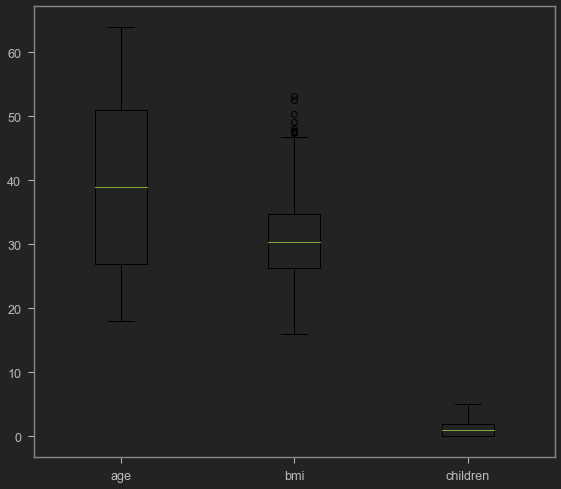

In [8]:
age = insurance['age']
bmi = insurance['bmi']
children = insurance['children']
columns = [age, bmi, children]
fig,ax = plt.subplots()
ax.boxplot(columns)
plt.xticks([1,2,3],['age', 'bmi', 'children'])
plt.tight_layout()

C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

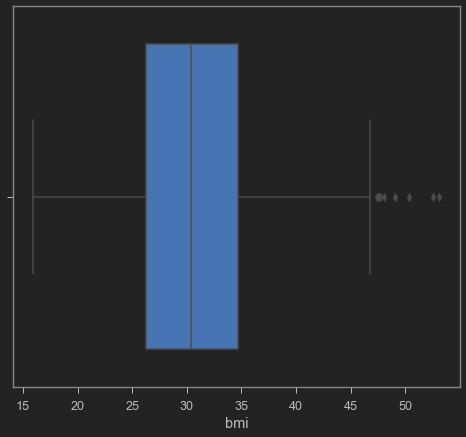

In [9]:
sns.boxplot(insurance['bmi'])

In [10]:
q1 = insurance['bmi'].quantile(0.25)
q3 = insurance['bmi'].quantile(0.75)
iqr = q3-q1

In [11]:
data = insurance[(insurance['bmi']<q3 + 1.5 * iqr) & (insurance['bmi']> q1 - 1.5 * iqr)]

In [12]:
data.shape

(1329, 7)

C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

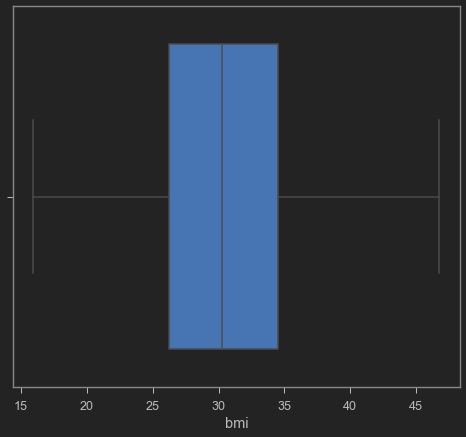

In [13]:
sns.boxplot(data['bmi'])

In [14]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


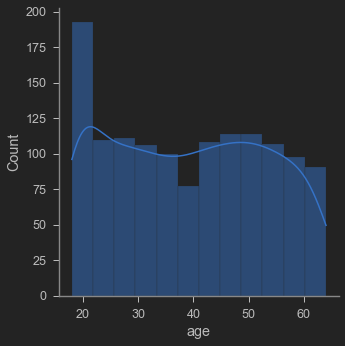

In [15]:
sns.displot(data['age'], kde=True)

C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

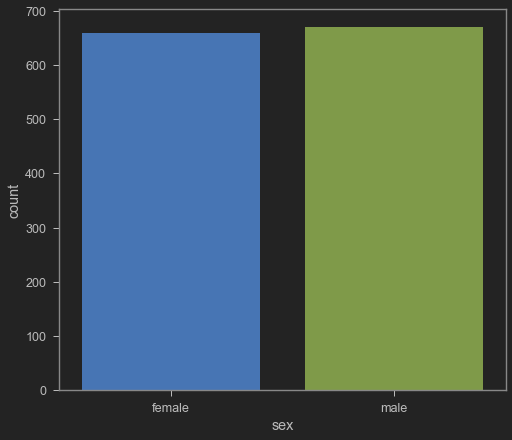

In [16]:
sns.countplot(data['sex'])

C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children', ylabel='count'>

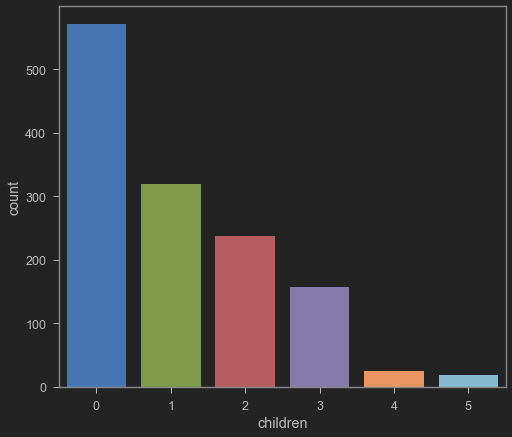

In [17]:
sns.countplot(data['children'])

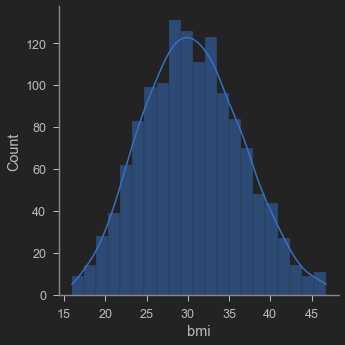

In [18]:
sns.displot(data['bmi'], kde= 'True')

C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='count'>

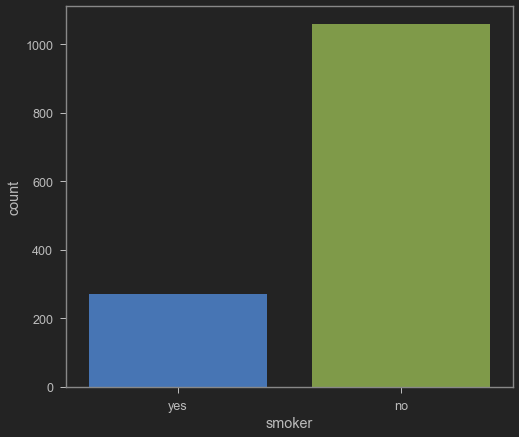

In [19]:
sns.countplot(data['smoker'])

### Data Preprocessing

In [30]:
data['region'].unique()

array([0, 1, 2, 3], dtype=int64)

In [31]:
data.replace({'sex':{'female':1, 'male':0}, 'smoker':{'yes':1, 'no':0}, 'region':{'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3}}, inplace= True)

C:\Users\62812\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [32]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [33]:
x = data.drop(columns='charges')
y = data['charges']

In [34]:
print(x.head())

   age  sex     bmi  children  smoker  region
0   19    1  27.900         0       1       0
1   18    0  33.770         1       0       1
2   28    0  33.000         3       0       1
3   33    0  22.705         0       0       2
4   32    0  28.880         0       0       2


In [35]:
print(y.head())

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=2)

#### Model Training

In [37]:
linreg = LinearRegression()

In [38]:
print(x_train.shape)
print(y_train.shape)

(1196, 6)
(1196,)


In [39]:
linreg.fit(x_train, y_train)

LinearRegression()

In [40]:
train_pred = linreg.predict(x_train)

In [41]:
r2_train = metrics.r2_score(y_train, train_pred)
print(r2_train)

0.7448873469045514


In [42]:
test_pred = linreg.predict(x_test)

In [43]:
r2_test = metrics.r2_score(y_test,test_pred)
print(r2_test)

0.7946413245890461


## Model Testing

In [47]:
input_data = (31,1,25.74,0,1,0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = linreg.predict(input_data_reshaped)

print('The insurance cost is USD ', prediction[0])

The insurance cost is USD  27087.58756615489
